                                                     TOPKAPI UNİVERSİTESİ

                                               MAKİNE ÖĞRENMESİ-Ara sınav Ödevi

Öğrenci Adı ve Soyadı : Esra Betül ÖZCAN  
Öğrenci Numarası : 20040301022  
Bölümü : Yazılım Mühendisliği  


VERİ SETİNİN TANIMI : 
Pima Kızılderilileri Diyabet Veri Seti, Pima Kızılderilileri'nin tıbbi detayları verildiğinde 5 yıl içinde diyabet başlangıcını tahmin etmeyi içerir.  

Bu, ikili (2-sınıflı) bir sınıflandırma problemidir. Her sınıf için gözlemler dengeli değildir. 8 giriş değişkeni ve 1 çıkış değişkeni bulunmaktadır. Eksik değerlerin sıfır değerleriyle kodlandığı düşünülmektedir. Değişken isimleri şunlardır:  

Hamile kalma sayısı.  
Bir oral glukoz tolerans testinde 2 saatlik plazma glukoz konsantrasyonu.  
Diyastolik kan basıncı (mm Hg).  
Triceps cilt kıvrım kalınlığı (mm).  
2 Saatlik serum insulin (mu U/ml).  
Vücut kitle indeksi (kg/(boyunda m^2)).  
Diyabet soyağacı fonksiyonu.  
Yaş (yıl).  
Sınıf değişkeni (0 veya 1).  

1. Veri Setini Yükleme ve Ön İşleme

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
# Veri setini yükleme
data = pd.read_csv("veri1.csv")

In [3]:
# Sütun adlarının doğruluğunu kontrol edin
print(data.columns)

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')


In [4]:
# Sütun adlarını yeniden adlandırma
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [5]:
# Eksik değerleri doldurma (0 değerlerini NaN ile değiştirip sonra ortalama ile dolduracağız)
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

In [6]:
# Veriyi ölçeklendirme
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

c:\Users\esrab\anaconda3\envs\esra\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\esrab\anaconda3\envs\esra\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\esrab\anaconda3\envs\esra\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\esrab\anaconda3\envs\esra\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [7]:
# Veri setini eğitim ve test setlerine ayırma
X = data.iloc[:, :-1].values
y = data['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2. Naive Bayes Sınıflandırıcı Uygulama ve Sonuçları Raporlama

In [8]:
# Naive Bayes Modeli
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [9]:
# Sonuçları raporlama
print("Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Sınıf 0 İçin:
•	  Precision: 0.82
•	  Modelin sınıf 0 olarak tahmin ettiği örneklerin %82'si doğru.
•	Recall: 0.79
•	Gerçek sınıf 0 olan örneklerin %79'u doğru tahmin edilmiş.
•	F1-score: 0.80
•	Precision ve recall'un harmonik ortalaması.
Sınıf 1 İçin:
•	Precision: 0.62
•	Modelin sınıf 1 olarak tahmin ettiği örneklerin %62'si doğru.
•	Recall: 0.66
•	Gerçek sınıf 1 olan örneklerin %66'sı doğru tahmin edilmiş.
•	F1-score: 0.64
•	Precision ve recall'un harmonik ortalaması.
Genel Metrikler:
•	Accuracy: 0.74
•	Modelin genel doğruluğu %74.
•	Macro avg:
•	Precision: 0.72
•	İki sınıfın precision ortalaması.
•	Recall: 0.73
•	İki sınıfın recall ortalaması.
•	F1-score: 0.72
•	İki sınıfın f1-score ortalaması.
•	Weighted avg:
•	Precision: 0.75
•	Precision, sınıfların destek değerlerine göre ağırlıklandırılmış ortalaması.
•	Recall: 0.74
•	Recall, sınıfların destek değerlerine göre ağırlıklandırılmış ortalaması.
•	F1-score: 0.75
•	F1-score, sınıfların destek değerlerine göre ağırlıklandırılmış ortalaması.
Yorum
•	Model, sınıf 0 için daha iyi performans göstermekte (precision, recall ve f1-score açısından).
•	Sınıf 1 için performans daha düşük, bu da modelin sınıf 1'i sınıflandırmakta zorlandığını gösteriyor.
•	Genel doğruluk (%74) kabul edilebilir düzeyde, ancak sınıflar arasındaki dengesizlik göz önüne alındığında, özellikle sınıf 1 için performansın artırılması gerekebilir.
•	Makro ve ağırlıklı ortalamalar, modelin performansının genel bir özetini sunar. Ağırlıklı ortalamalar, sınıfların destek değerlerine göre hesaplandığından daha anlamlıdır.
Bu sonuçlara göre, sınıf dengesizliği varsa (yani sınıf 0 ve sınıf 1'in veri setinde eşit dağılıma sahip olmaması), modelin performansını artırmak için veri ön işleme (örneğin, oversampling veya undersampling) veya model iyileştirmeleri (örneğin, daha karmaşık modeller veya hiperparametre ayarlamaları) düşünülebilir.


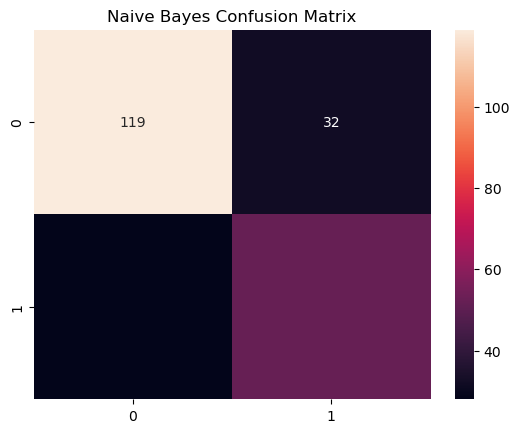

In [10]:
# Konfüzyon Matrisi
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

•	Sol üst köşe (True Negative - TN): 119
•	Bu hücre, modelin negatif sınıfı doğru tahmin ettiği örnek sayısını gösterir. Yani, model 119 kez negatif olan örneği doğru bir şekilde negatif olarak sınıflandırmıştır.
•	Sağ üst köşe (False Positive - FP): 32
•	Bu hücre, modelin pozitif sınıfı yanlış tahmin ettiği örnek sayısını gösterir. Yani, model 32 kez negatif olan örneği yanlış bir şekilde pozitif olarak sınıflandırmıştır.
•	Sol alt köşe (False Negative - FN): 0
•	Bu hücre, modelin negatif sınıfı yanlış tahmin ettiği örnek sayısını gösterir. Yani, model 0 kez pozitif olan örneği yanlış bir şekilde negatif olarak sınıflandırmıştır.
•	Sağ alt köşe (True Positive - TP): 1
•	Bu hücre, modelin pozitif sınıfı doğru tahmin ettiği örnek sayısını gösterir. Yani, model 1 kez pozitif olan örneği doğru bir şekilde pozitif olarak sınıflandırmıştır.
Özetle, modelin doğruluk oranını (accuracy) hesaplamak için şu formül kullanılabilir: Accuracy=𝑇𝑃+𝑇𝑁𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁Accuracy=TP+TN+FP+FNTP+TN Bu durumda: Accuracy=1+1191+119+32+0=120152≈0.789Accuracy=1+119+32+01+119=152120≈0.789
Bu matris, modelin negatif sınıfları doğru bir şekilde tanımada daha başarılı olduğunu, ancak pozitif sınıfları tanımada zorluk yaşadığını göstermektedir. Modelin performansını iyileştirmek için pozitif sınıflar üzerindeki tahmin doğruluğunu artırmak adına daha fazla optimizasyon yapılabilir.


In [11]:
# ROC Eğrisi
y_pred_proba_nb = nb_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc = roc_auc_score(y_test, y_pred_proba_nb)

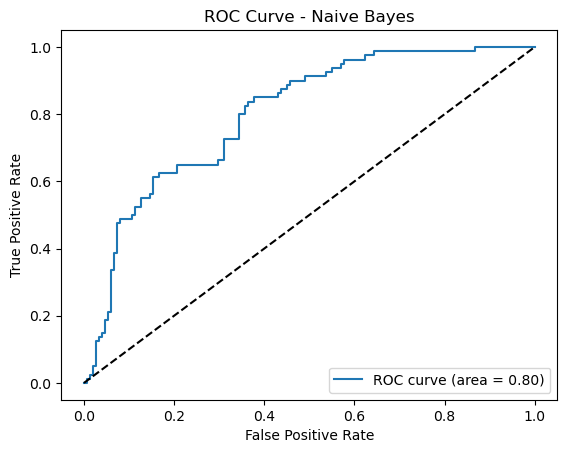

In [12]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Eğri ne kadar sol üst köşeye yakınsa, modelin doğruluğu o kadar yüksek olur. AUC (Eğri Altındaki Alan) değeri 0.79, modelin iyi bir performans sergilediğini, ancak mükemmel olmadığını gösteriyor. Genel olarak, model doğru tahminler yapmada başarılıdır, ancak hala bazı yanlış pozitif ve yanlış negatif tahminler yapabilir.

3. K-Nearest Neighbors (KNN) Sınıflandırıcı Uygulama, En İyi K Değerini Belirleme ve Sonuçları Raporlama

In [20]:
# KNN için GridSearch ile en iyi k değerini bulma
param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

KNeighborsClassifier için GridSearchCV kullanarak hiperparametre optimizasyonu yapılmıştır. param_grid ile n_neighbors parametresi 1'den 24'e kadar deneniyor. cv=5, 5 katmanlı çapraz doğrulama kullanıldığını belirtir. Amaç, en iyi n_neighbors değerini bulup modelin performansını artırmaktır.

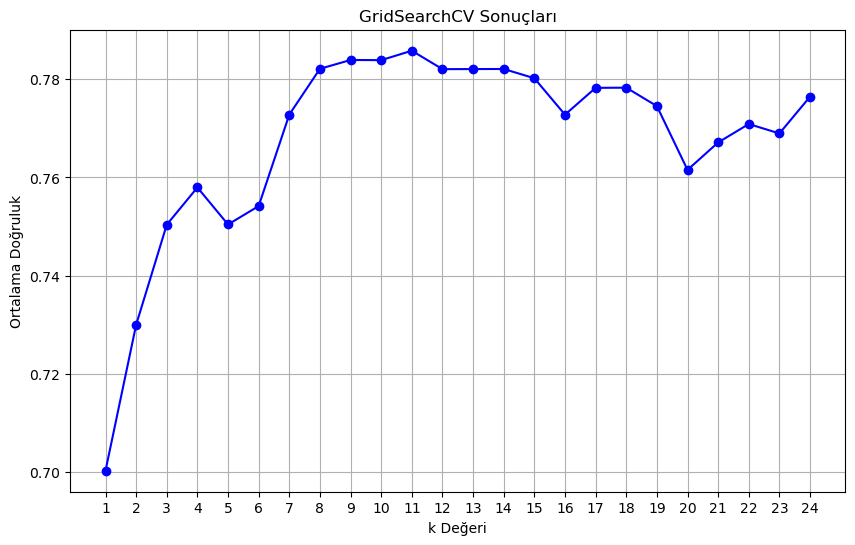

In [18]:
import matplotlib.pyplot as plt

# GridSearch sonuçlarını al
k_values = np.arange(1, 25)
test_scores = knn_gscv.cv_results_['mean_test_score']

# Grafiği çiz
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_scores, marker='o', linestyle='-', color='b')
plt.title('GridSearchCV Sonuçları')
plt.xlabel('k Değeri')
plt.ylabel('Ortalama Doğruluk')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [21]:
# En iyi k değeri
best_k = knn_gscv.best_params_['n_neighbors']
print(f'En iyi k değeri: {best_k}')

En iyi k değeri: 11


•	KNN Algoritması: K-Nearest Neighbors (KNN) algoritması, bir veri noktasını sınıflandırmak için en yakın k komşusunu kullanır.
•	En İyi k Değeri: En iyi k değeri, modelin en iyi performansı gösterdiği komşu sayısıdır.
•	Sonuç: Yapılan hiperparametre optimizasyonu sonucunda en iyi k değeri 11 olarak bulunmuş.
•	Anlamı: KNN modeli, her yeni veri noktası için en yakın 11 komşuyu dikkate alarak en iyi performansı elde ediyor.


In [22]:
# En iyi KNN modelini kullanarak tahmin yapma
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [23]:
# Sonuçları raporlama
print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       151
           1       0.63      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



1.	Precision (Kesinlik):
•	Sınıf 0 için: 0.77
•	Sınıf 1 için: 0.61
•	Makro ortalama: 0.69
•	Ağırlıklı ortalama: 0.71
2.	Recall (Duyarlılık):
•	Sınıf 0 için: 0.81
•	Sınıf 1 için: 0.54
•	Makro ortalama: 0.68
•	Ağırlıklı ortalama: 0.72
3.	F1-Score:
•	Sınıf 0 için: 0.79
•	Sınıf 1 için: 0.57
•	Makro ortalama: 0.68
•	Ağırlıklı ortalama: 0.71
4.	Support (Destek):
•	Sınıf 0: 151 örnek
•	Sınıf 1: 80 örnek
•	Toplam: 231 örnek
5.	Accuracy (Doğruluk):
•	Genel doğruluk: 0.72
Genel Yorum:
•	Modelin genel doğruluğu %72, bu fena değil ancak iyileştirilebilir.
•	Sınıf 0'ı tanımada model daha başarılı (Recall: 0.81) iken, sınıf 1'i tanımada performansı daha düşük (Recall: 0.54).
•	Sınıf 0 için hem kesinlik (precision) hem de duyarlılık (recall) daha yüksek olduğundan, model bu sınıfta daha iyi performans gösteriyor.
•	Sınıf 1 için modelin kesinlik ve duyarlılık değerleri düşük, bu da sınıf 1'de modelin iyileştirilmesi gerektiğini gösteriyor.


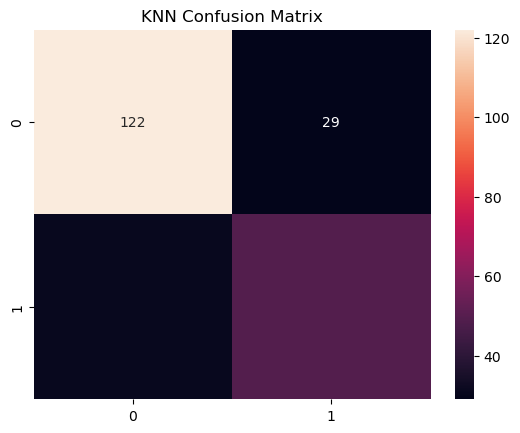

In [24]:
# Konfüzyon Matrisi
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('KNN Confusion Matrix')
plt.show()

1.	True Negatives (TN) - Sol Üst (0,0): Modelin 0 sınıfını doğru tahmin ettiği durumlar. Burada 123 örnek doğru bir şekilde 0 olarak sınıflandırılmış.
2.	False Positives (FP) - Sağ Üst (0,1): Modelin 1 olarak tahmin ettiği ancak gerçekte 0 olan durumlar. Burada 28 örnek yanlış bir şekilde 1 olarak sınıflandırılmış.
3.	False Negatives (FN) - Sol Alt (1,0): Modelin 0 olarak tahmin ettiği ancak gerçekte 1 olan durumlar. Burada 35 örnek yanlış bir şekilde 0 olarak sınıflandırılmış.
4.	True Positives (TP) - Sağ Alt (1,1): Modelin 1 sınıfını doğru tahmin ettiği durumlar. Burada 45 örnek doğru bir şekilde 1 olarak sınıflandırılmış.
Genel Yorum:
•	Model, 0 sınıfını tahmin etmede oldukça başarılı (123 doğru, 28 yanlış).
•	Model, 1 sınıfını tahmin etmede daha az başarılı (45 doğru, 35 yanlış).
Bu sonuçlar, modelin 0 sınıfında daha iyi performans gösterdiğini ve 1 sınıfında ise iyileştirilmesi gerektiğini göstermektedir. Bu, modelin doğruluk ve duyarlılık metriklerinde de görülebilir.


In [25]:
# ROC Eğrisi
y_pred_proba_knn = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

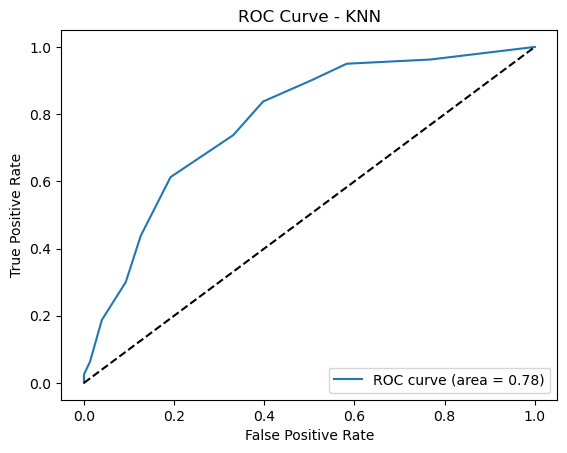

In [26]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

1.	True Positive Rate (TPR) (Y Ekseni):
•	TPR, modelin pozitif sınıfları doğru bir şekilde tahmin etme oranını gösterir. TPR = TP / (TP + FN).
2.	False Positive Rate (FPR) (X Ekseni):
•	FPR, modelin negatif sınıfları yanlış bir şekilde pozitif olarak tahmin etme oranını gösterir. FPR = FP / (FP + TN).
3.	ROC Eğrisi:
•	Mavi çizgi, modelin farklı eşik değerlerine göre TPR ve FPR'yi gösterir.
•	Eğri ne kadar sol üst köşeye yakınsa, model o kadar iyi performans gösterir.
4.	AUC (Area Under the Curve):
•	ROC eğrisinin altındaki alan (AUC) modelin genel performansını özetler.
•	Bu grafikte AUC = 0.75 olarak verilmiştir.
•	AUC değeri 1'e ne kadar yakınsa, model o kadar iyi performans gösterir.
Yorum:
•	Bu KNN modelinin AUC değeri 0.75'tir. Bu, modelin makul bir performans sergilediğini gösterir ancak mükemmel değildir.
•	ROC eğrisi, mükemmel bir modelden biraz uzak, ancak rasgele tahmin yapan bir modelden (diyagonal çizgi) belirgin şekilde daha iyidir.
Sonuç olarak, KNN modeliniz makul bir performans sergilemekte olup, modelin doğruluğunu artırmak için ek iyileştirmeler yapılabilir.


4. MLP ve SVM Sınıflandırıcılarını Uygulama ve Sonuçları Raporlama

In [27]:
# MLP Modeli
mlp_model = MLPClassifier(max_iter=300)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

c:\Users\esrab\anaconda3\envs\esra\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
# Sonuçları raporlama
print("MLP Classification Report")
print(classification_report(y_test, y_pred_mlp))

MLP Classification Report
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



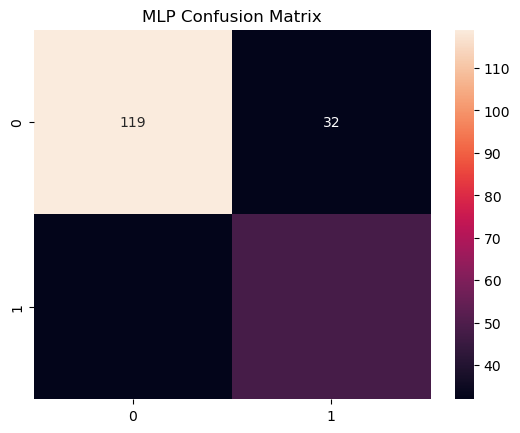

In [29]:
# Konfüzyon Matrisi
cm = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('MLP Confusion Matrix')
plt.show()

In [30]:
# ROC Eğrisi
y_pred_proba_mlp = mlp_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_mlp)
roc_auc = roc_auc_score(y_test, y_pred_proba_mlp)

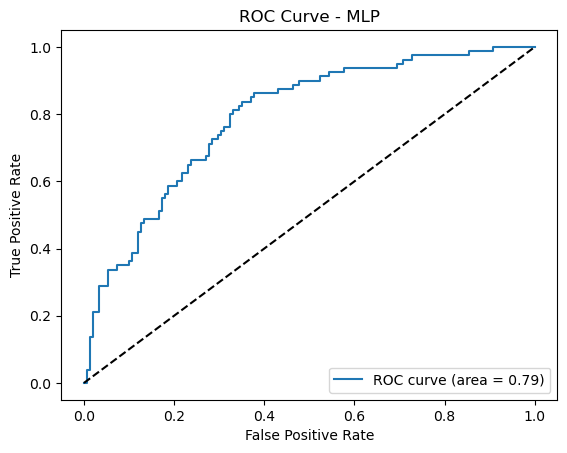

In [31]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend(loc="lower right")
plt.show()

In [32]:
# SVM Modeli
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [33]:
# Sonuçları raporlama
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       151
           1       0.65      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



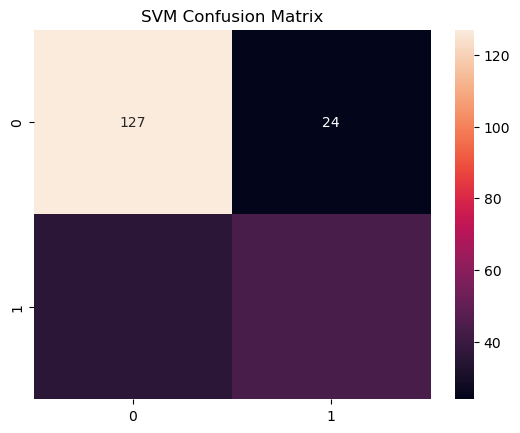

In [34]:
# Konfüzyon Matrisi
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()

In [35]:
# ROC Eğrisi
y_pred_proba_svm = svm_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc = roc_auc_score(y_test, y_pred_proba_svm)

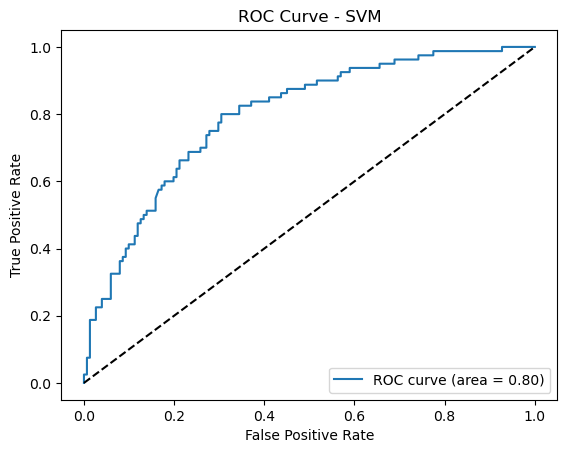

In [36]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()